Confidential: Property of the Data Jedi Academy, unauthorised distribution not allowed

<img align="left" src = "DATA-JEDI logo.png" width="200" height="60">

## Data Manipulation: Basic Introduction

### Introduction
Pandas is a very powerful library in Python with the ability to handle and manipulate data. It is capable of working with large datasets and tackling complex data manipulation tasks. In this tutorial, we will focus on the common data manipulation tasks which you will find helpful on your Python projects.  

Content

1. Groupby
2. Concat and Append
3. Sort
4. Cut
5. Apply
6. Lambda
7. Merge
8. Transform


### Dataset

#### Importing the data set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The dataset below is the customer and sales data of a company that sells various categories of goods including beverages, dairy products, confections etc.  

- Customers data: These are the company customers.
- Products: These are company products sold to customers.
- Orders: Orders made by customers
-Orderlines: The product details (e.g. quantity, price etc.) of order made by customers 

In [2]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
orders = pd.read_csv('Orders.csv')
orderdetails = pd.read_csv('OrderDetails.csv')

### 1. Group By

Groupby essentially splits the data into different groups depending on a variable of your choice. For example, the expression df.groupby(‘orderid’) will split our orderdetails DataFrame by the orderid. 
In a groupby manipulation in Pandas, we typically will require three items:

- Items to group by. For example, group by orderid. Typically in Pandas, you can groupby one or multiple columns. To achieve multiple column grouping, columns will be added to a list like this df.groupby(['productid', 'orderid']).
- Item to aggregate. For example after grouping by orderid, you may want to see the total quantity per order. In this case, quantity is the item we are aggregating by.
- Aggregation to be done .Functions like max(), min(), mean(), first(), last() can be quickly applied to GroupBy to obtain summary statistics for each order.


[Intro to Groupby](https://www.analyticsvidhya.com/blog/2020/03/groupby-pandas-aggregating-data-python/)


In [3]:
#Inspect the orderdetails table
orderdetails.head()

,OrderDetailID,OrderID,ProductID,Quantity
0,1,10248,11,12
1,2,10248,42,10
2,3,10248,72,5
3,4,10249,14,9
4,5,10249,51,40


In [4]:
#Group by product ID to find the total quantity ordered per product
orderdetails.groupby('OrderID')['Quantity'].sum()

OrderID
10248     27
10249     49
10250     60
10251     41
10252    105
        ... 
10439     67
10440    208
10441     50
10442    170
10443     18
Name: Quantity, Length: 196, dtype: int64

In order to return a dataframe output after applying groupby, you can use the reset_index function to achieve this.

In [5]:
#Return a dataframe output after groupby
orderdetails.groupby('OrderID')['Quantity'].sum().reset_index()

,OrderID,Quantity
0,10248,27
1,10249,49
2,10250,60
3,10251,41
4,10252,105
...,...,...
191,10439,67
192,10440,208
193,10441,50
194,10442,170


### 2. Concat and Append

With concatenation in Pandas, two or more datasets are just stitched together along an axis — either the row axis or column axis. For example, if you have two datasets with 100 records and 10 columns each, the concat function (pd.concat()) can do either of the following:
- Stitch along the columns - This will result in a third dataset with 100 records and 20 columns
- Stitch along the rows - This will result in a third dataset with 200 records and 10 columns

The second outcome above is the same as append function (pd.append()) in pandas. Typically append is done along the rows. This means append can be achieved in two ways, either by using the append function (pd.append()) or by using the concat function (pd.concat()) and setting the concat options to stitch along rows.

[Concat and append in Pandas](https://medium.com/analytics-vidhya/a-tip-a-day-python-tip-5-pandas-concat-append-dev-skrol-18e4950cc8cc)


This is represented in the diagram below.

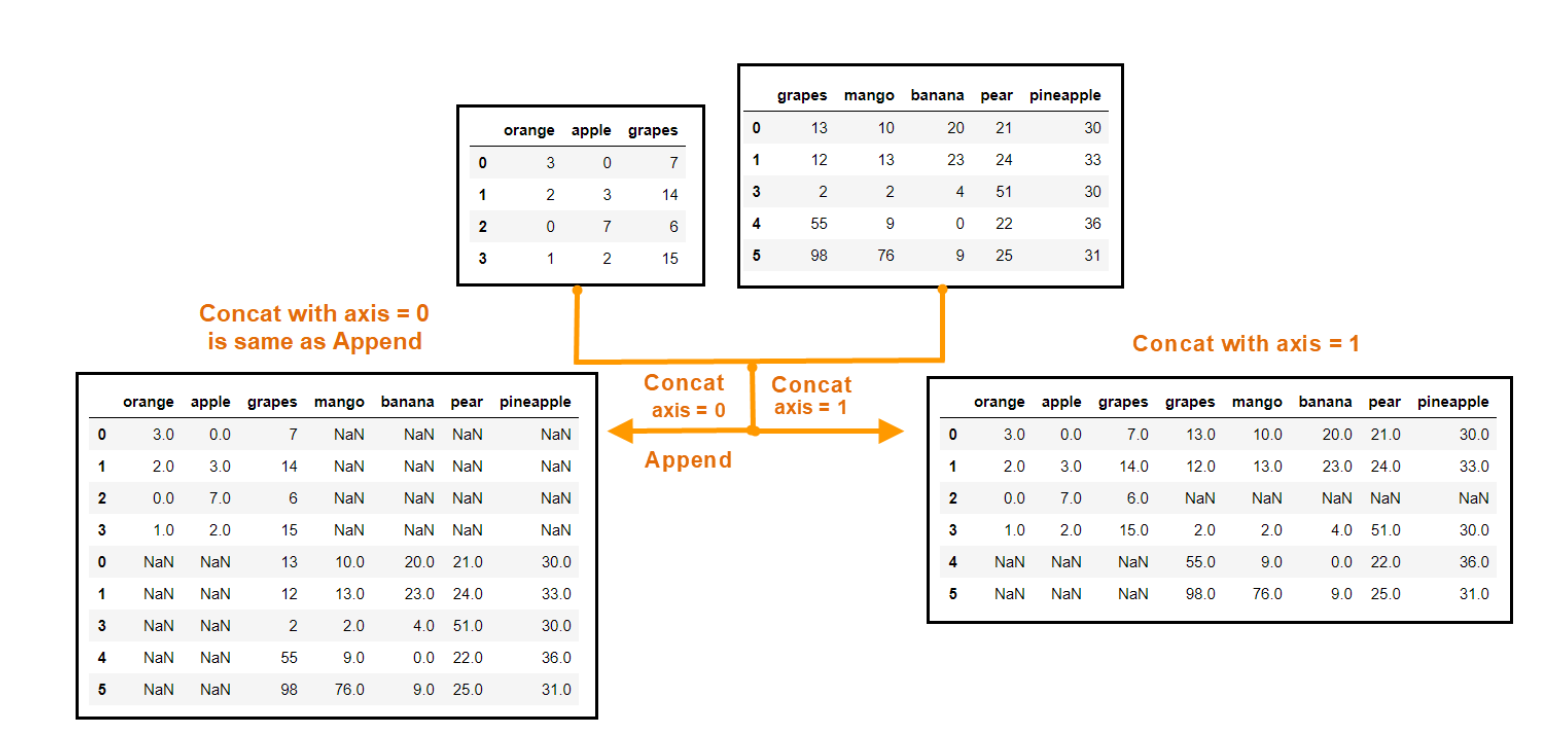

For the concat example, we will create two new dataframes from our customer data. The first will contain the first 3 columns of the data while the second will contain the last 4 columns. We will then use the concat function to concatenate both dataframe to return a complete dataframe.

In [6]:
customers.head()

,CustomerID,CustomerName,ContactName,Address,City,PostalCode,Country
0,1,Alfreds Futterkiste,Maria Anders,Obere Str. 57,Berlin,12209,Germany
1,2,Ana Trujillo Emparedados y helados,Ana Trujillo,Avda. de la Constituci�n 2222,M�xico D.F.,5021,Mexico
2,3,Antonio Moreno Taquer�a,Antonio Moreno,Mataderos 2312,M�xico D.F.,5023,Mexico
3,4,Around the Horn,Thomas Hardy,120 Hanover Sq.,London,WA1 1DP,UK
4,5,Berglunds snabbk�p,Christina Berglund,Berguvsv�gen 8,Lule�,S-958 22,Sweden


In [7]:
customers_concat1 = customers[['CustomerID', 'CustomerName', 'ContactName']]
customers_concat1.head(1)

,CustomerID,CustomerName,ContactName
0,1,Alfreds Futterkiste,Maria Anders


In [8]:
customers_concat2 = customers[['Address', 'City','PostalCode', 'Country']]
customers_concat2.head(1)

,Address,City,PostalCode,Country
0,Obere Str. 57,Berlin,12209,Germany



The two data frames are concatenated below using the concat function.

In [9]:
pd.concat([customers_concat1,customers_concat2], axis = 1).head(5)

,CustomerID,CustomerName,ContactName,Address,City,PostalCode,Country
0,1,Alfreds Futterkiste,Maria Anders,Obere Str. 57,Berlin,12209,Germany
1,2,Ana Trujillo Emparedados y helados,Ana Trujillo,Avda. de la Constituci�n 2222,M�xico D.F.,5021,Mexico
2,3,Antonio Moreno Taquer�a,Antonio Moreno,Mataderos 2312,M�xico D.F.,5023,Mexico
3,4,Around the Horn,Thomas Hardy,120 Hanover Sq.,London,WA1 1DP,UK
4,5,Berglunds snabbk�p,Christina Berglund,Berguvsv�gen 8,Lule�,S-958 22,Sweden


For the append example, we will create two new dataframes from our customer data. The first will contain the first 50 rows of the data while the second will contain the last 41 rows. We will then use the append function to append both dataframe to return a complete dataframe.

In [10]:
customers_append1 = customers[0:50]
customers_append1.head(2)

,CustomerID,CustomerName,ContactName,Address,City,PostalCode,Country
0,1,Alfreds Futterkiste,Maria Anders,Obere Str. 57,Berlin,12209,Germany
1,2,Ana Trujillo Emparedados y helados,Ana Trujillo,Avda. de la Constituci�n 2222,M�xico D.F.,5021,Mexico


In [11]:
customers_append2 = customers[50:]
customers_append2.head(2)

,CustomerID,CustomerName,ContactName,Address,City,PostalCode,Country
50,51,M�re Paillarde,Jean Fresni�re,43 rue St. Laurent,Montr�al,H1J 1C3,Canada
51,52,Morgenstern Gesundkost,Alexander Feuer,Heerstr. 22,Leipzig,4179,Germany


In [12]:
print('size of 1st data frame: ',customers_append1.shape)
print('size of 2nd data frame: ',customers_append2.shape)

size of 1st data frame:  (50, 7)
size of 2nd data frame:  (41, 7)


The two data frames are append below using the append function.

In [13]:
customers_append1.append(customers_append2)

,CustomerID,CustomerName,ContactName,Address,City,PostalCode,Country
0,1,Alfreds Futterkiste,Maria Anders,Obere Str. 57,Berlin,12209,Germany
1,2,Ana Trujillo Emparedados y helados,Ana Trujillo,Avda. de la Constituci�n 2222,M�xico D.F.,5021,Mexico
2,3,Antonio Moreno Taquer�a,Antonio Moreno,Mataderos 2312,M�xico D.F.,5023,Mexico
3,4,Around the Horn,Thomas Hardy,120 Hanover Sq.,London,WA1 1DP,UK
4,5,Berglunds snabbk�p,Christina Berglund,Berguvsv�gen 8,Lule�,S-958 22,Sweden
...,...,...,...,...,...,...,...
86,87,Wartian Herkku,Pirkko Koskitalo,Torikatu 38,Oulu,90110,Finland
87,88,Wellington Importadora,Paula Parente,"Rua do Mercado, 12",Resende,08737-363,Brazil
88,89,White Clover Markets,Karl Jablonski,305 - 14th Ave. S. Suite 3B,Seattle,98128,USA
89,90,Wilman Kala,Matti Karttunen,Keskuskatu 45,Helsinki,21240,Finland


### 3. Sort

Pandas provides a function for sorting dataframes based on various parameters. With Pandas sort (pd.sort_values()) you can achieve the following:
- Sort by one or more columns - You can easily sort by one column or a list of columns
- Sort in a specific order - You can easily sort in ascending or descending order

We will sort the orderdetails table by quantity

In [14]:
#Sort in ascending order
orderdetails.sort_values('Quantity',ascending = True).head(5)

,OrderDetailID,OrderID,ProductID,Quantity
33,34,10259,37,1
161,162,10308,69,1
86,87,10281,19,1
450,451,10417,46,2
117,118,10291,51,2


In [15]:
#Sort in descending order
orderdetails.sort_values('Quantity',ascending = False).head(5)

,OrderDetailID,OrderID,ProductID,Quantity
400,401,10398,55,120
102,103,10286,35,100
511,512,10440,61,90
334,335,10373,58,80
514,515,10442,54,80


### 4. Cut

The pandas cut function (pd.cut) divides the entire value range into bins. An easy way to understand the cut function is to thing about splitting order quantity into groups (<20,21-50,50-100,>100). Cut helps to identify and assign the records which fall in this category ranges which are called bins. 

The cut function performs this binning operation and then assigns each value in the appropriate bin. 

In [16]:
#Create Quantity groups
orderdetails['Quantity_group'] = pd.cut(x=orderdetails['Quantity'], bins=[1, 20, 50, 100, 200],
                    labels=['Very low', 'Low', 'Moderate','High'])

In [17]:
orderdetails.head(5)

,OrderDetailID,OrderID,ProductID,Quantity,Quantity_group
0,1,10248,11,12,Very low
1,2,10248,42,10,Very low
2,3,10248,72,5,Very low
3,4,10249,14,9,Very low
4,5,10249,51,40,Low


### 5. Apply

One alternative to using a loop to iterate over a DataFrame is to use the pandas .apply() method. It takes a function as an input and applies this function to an entire DataFrame.

If you are working with tabular data, you must specify an axis you want your function to act on (0 for columns; and 1 for rows). By default, it will apply a function to all values of a column. To perform it on a row instead, you can specify the argument axis=1 in the apply() function call.

[Apply function in Pandas](https://www.datacamp.com/community/tutorials/pandas-apply)

We will be applying a Python internal function to the dataframe. We will apply the square root function in numpy for this. We will apply the square root function to the order quantity column.

In [18]:
orderdetails['Quantity_root'] = orderdetails['Quantity'].apply(np.sqrt)
orderdetails.head()

,OrderDetailID,OrderID,ProductID,Quantity,Quantity_group,Quantity_root
0,1,10248,11,12,Very low,3.464102
1,2,10248,42,10,Very low,3.162278
2,3,10248,72,5,Very low,2.236068
3,4,10249,14,9,Very low,3.000000
4,5,10249,51,40,Low,6.324555


We will be applying a Python custom function to the dataframe. We will create a custom function that checks if a customer's full name (first and last name) contains a specific word; if it does, it returns a 1 otherwise 0. We will apply the custom function to the customer name column.

In [19]:
def word_checker(sentence):
    if "alfred" in sentence.lower():
        value = 1
    else:
        value = 0
    return value

We will test the function below on just the first row of the customername column in the customer data (Alfreds Futterkiste)

In [20]:
customers.head()

,CustomerID,CustomerName,ContactName,Address,City,PostalCode,Country
0,1,Alfreds Futterkiste,Maria Anders,Obere Str. 57,Berlin,12209,Germany
1,2,Ana Trujillo Emparedados y helados,Ana Trujillo,Avda. de la Constituci�n 2222,M�xico D.F.,5021,Mexico
2,3,Antonio Moreno Taquer�a,Antonio Moreno,Mataderos 2312,M�xico D.F.,5023,Mexico
3,4,Around the Horn,Thomas Hardy,120 Hanover Sq.,London,WA1 1DP,UK
4,5,Berglunds snabbk�p,Christina Berglund,Berguvsv�gen 8,Lule�,S-958 22,Sweden


In [21]:
#First row of the customer name column
customers['CustomerName'][0]

'Alfreds Futterkiste'

In [22]:
#Test the function on the first row of the customer name column
word_checker(customers['CustomerName'][0])

1

The output of the function is 1. This means the function works. Now we will use the apply function to apply this function to every row in the customername column. We will assign the output to a new column.

In [23]:
#Use apply function to run the function on all rows in the customer name column
customers['Name_flag'] = customers['CustomerName'].apply(word_checker)
customers.head()

,CustomerID,CustomerName,ContactName,Address,City,PostalCode,Country,Name_flag
0,1,Alfreds Futterkiste,Maria Anders,Obere Str. 57,Berlin,12209,Germany,1
1,2,Ana Trujillo Emparedados y helados,Ana Trujillo,Avda. de la Constituci�n 2222,M�xico D.F.,5021,Mexico,0
2,3,Antonio Moreno Taquer�a,Antonio Moreno,Mataderos 2312,M�xico D.F.,5023,Mexico,0
3,4,Around the Horn,Thomas Hardy,120 Hanover Sq.,London,WA1 1DP,UK,0
4,5,Berglunds snabbk�p,Christina Berglund,Berguvsv�gen 8,Lule�,S-958 22,Sweden,0


### 6. Lambda functions

For loops are the antithesis of efficient programming. They’re still necessary and are the first conditional loops taught to Python beginners but in my opinion, they leave a lot to be desired.

These for loops can be cumbersome and can make our Python code bulky and untidy. But wait – what’s the alternative solution? Lambda functions in Python!

You can write tidier Python code and speed up your machine learning tasks. The trick lies in mastering lambda functions and this is where beginners can trip up.

A lambda function is a small function containing a single expression. Lambda functions can also act as anonymous functions where they don’t require any name. These are very helpful when we have to perform small tasks with less code.

[Lambda functions](https://www.analyticsvidhya.com/blog/2020/03/what-are-lambda-functions-in-python/)

#### Lambda functions VS normal functions
Lambda functions are defined using the keyword lambda. They can have any number of arguments but only one expression. They are generally used for one-line expressions.

Regular functions are created using the def keyword. They can have any number of arguments and any number of expressions. They are generally used for large blocks of code.

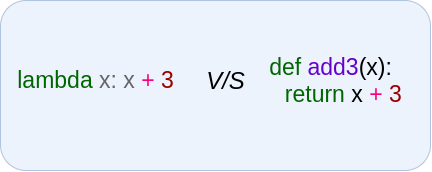

#### Lambda with apply
When working with dataframes in Pandas, Lambda functions are typically used with the apply function (apply()). The apply() function calls the lambda function and applies it to every row or column of the dataframe and returns a modified copy of the dataframe. An example is shown below.





We can rewrite the word_checker function using lambda functions as shown below

In [23]:
(lambda x: 1 if "alfred" in x.lower() else 0) #defines lambda function
(customers['CustomerName'][0]) #defines function argument

'Alfreds Futterkiste'

We can also include and "OR" operator within a lambda function as seen below:

In [24]:
(lambda x: 1 if "Alfred" in x.lower() or "futter" in x.lower() else 0)(customers['CustomerName'][0])

1

The lambda functions simplifies the function's original 6 lines of code to just 1 line of code.
The first bracket contains the lambda function while the second bracket contains the argument for the function.

The lambda function can also be used with the apply function as seen below. Lambda helps us to avoid creating several custom functions. Functions will only be created when they are too complex for a lambda function.

In [25]:
customers['Name_flag'] = customers['CustomerName'].apply(lambda x: 1 if "alfred" in x.lower() else 0)
customers.head()

,CustomerID,CustomerName,ContactName,Address,City,PostalCode,Country,Name_flag
0,1,Alfreds Futterkiste,Maria Anders,Obere Str. 57,Berlin,12209,Germany,1
1,2,Ana Trujillo Emparedados y helados,Ana Trujillo,Avda. de la Constituci�n 2222,M�xico D.F.,5021,Mexico,0
2,3,Antonio Moreno Taquer�a,Antonio Moreno,Mataderos 2312,M�xico D.F.,5023,Mexico,0
3,4,Around the Horn,Thomas Hardy,120 Hanover Sq.,London,WA1 1DP,UK,0
4,5,Berglunds snabbk�p,Christina Berglund,Berguvsv�gen 8,Lule�,S-958 22,Sweden,0


### 7. Merge 

Pandas provides a huge range of methods and functions to manipulate data, including merging DataFrames. Merging DataFrames allows you to create a new DataFrame without modifying the original data source or alter the original data source.

If you are familiar with the SQL or a similar type of tabular data, you probably are familiar with the term join, which means combining DataFrames to form a new DataFrame. [Merge in Pandas](https://stackabuse.com/how-to-merge-dataframes-in-pandas/)

For a Pandas merge (pd.merge) the following are key concepts to know:

- Join key column: The default behavior of pd.merge() is to look for one or more matching column names between the two datasets, and uses this as the key. However, often the column names will not match so nicely, and pd.merge() provides a way for you to explicitly specify the name of the key column(s).

- Type of join: The pd.merge() function implements a number of types of joins: the one-to-one, many-to-one, and many-to-many joins. Perhaps the simplest and most common types of merge expression are the one-to-one and one-to-many joins. The joins are typically done on a common matching column which both datasets have. In a one-to-many join, one of your datasets will have many rows in the common matching column that repeat the same values (e.g. 1, 1, 3, 5, 5), while the common matching column in the other dataset will not have repeat values (e.g. 1, 3, 5). In a one-to-one join, both of your datasets will not have repeat values (e.g. 1, 3, 5). 

- Left Join: Keep every row in the left dataframe. Where there are missing values of matching column in the right dataframe, add empty / NaN values in the result.

- Right Join: Keep every row in the right dataframe. Where there are missing values of matching column in the left dataframe, add empty / NaN values in the result.

- Inner Join: Keep only the common values in both the left and right dataframes for the merged data.

- Outer Join: combines all the rows for left and right dataframes with NaN when there are no matched values in the rows.


[How to use merge in pandas](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html)


We will use the merge function to merge the customer table and orders table, in order to see which customers placed specific orders. The join will have the following properties:

- Join key column: The customerID column will be used as the join key because it is common to both tables
- Type of join: This will be a 1 to many join. The customer table has unique customer IDs while the orders table has the customer ID repeated multiple times because 1 customer can have several orders.
-Inner Join: We will keep common values from both dataframes because we need customers who already have existing orders. If we need customers without orders, we could use a left join with customers being the dataframe on the left.



In [26]:
customers.head(2)

,CustomerID,CustomerName,ContactName,Address,City,PostalCode,Country,Name_flag
0,1,Alfreds Futterkiste,Maria Anders,Obere Str. 57,Berlin,12209,Germany,1
1,2,Ana Trujillo Emparedados y helados,Ana Trujillo,Avda. de la Constituci�n 2222,M�xico D.F.,5021,Mexico,0


In [27]:
orders.head(2)

,OrderID,CustomerID,EmployeeID,OrderDate,ShipperID
0,10248,90,5,7/4/1996,3
1,10249,81,6,7/5/1996,1


In [28]:
pd.merge(customers,orders,on = "CustomerID").head(5)

,CustomerID,CustomerName,ContactName,Address,City,PostalCode,Country,Name_flag,OrderID,EmployeeID,OrderDate,ShipperID
0,2,Ana Trujillo Emparedados y helados,Ana Trujillo,Avda. de la Constituci�n 2222,M�xico D.F.,5021,Mexico,0,10308,7,9/18/1996,3
1,3,Antonio Moreno Taquer�a,Antonio Moreno,Mataderos 2312,M�xico D.F.,5023,Mexico,0,10365,3,11/27/1996,2
2,4,Around the Horn,Thomas Hardy,120 Hanover Sq.,London,WA1 1DP,UK,0,10355,6,11/15/1996,1
3,4,Around the Horn,Thomas Hardy,120 Hanover Sq.,London,WA1 1DP,UK,0,10383,8,12/16/1996,3
4,5,Berglunds snabbk�p,Christina Berglund,Berguvsv�gen 8,Lule�,S-958 22,Sweden,0,10278,8,8/12/1996,2


### 8. Transform function

One of the compelling features of pandas is that it has a rich library of methods for manipulating data. However, there are times when it is not clear what the various functions do and how to use them. If you are approaching a problem from an Excel mindset, it can be difficult to translate the planned solution into the unfamiliar pandas command. One of those “unknown” functions is the transform method.

Transform function is a handy tool to have as a data scientist! It is a powerful function that you can lean on for feature engineering in Python. Transform comes in handy during feature extraction. We can extract new features from existing ones.  Transform can typically be used to return a new column with transformed values based on a function applied to one or multiple existing columns. 

An alternative to transform is groupby and merge approach. However while this approach is more complex and requires at least 7 rows of code, transform will perform the same operation with 1 or 2 lines of code.

[Transform functions](https://pbpython.com/pandas_transform.html)

Imagine we need to know the products with the highest number of sales. To achieve this, we will need to aggregate the value of each products' order quantity.

First let us merge the product table to the orderdetails table.

In [29]:
product_orders = pd.merge(products,orderdetails)
product_orders.head(3)

,ProductID,ProductName,SupplierID,CategoryID,Unit,Price,OrderDetailID,OrderID,Quantity,Quantity_group,Quantity_root
0,1,Chais,1,1,10 boxes x 20 bags,18.0,100,10285,45,Low,6.708204
1,1,Chais,1,1,10 boxes x 20 bags,18.0,124,10294,18,Very low,4.242641
2,1,Chais,1,1,10 boxes x 20 bags,18.0,185,10317,20,Very low,4.472136


What if we need to add the aggregated product sales per product as a column. We can achieve that in two ways:

- Create a new dataframe that uses groupby to aggregate the value per product and merge it back to the original dataframe. This will be about 7 lines of code.
- Use the transform function. This will be just one line of code.

Let's see both methods in action.

In [30]:
#Create aggregate using groupby and convert it to a dataframe
aggregate_product = product_orders.groupby('ProductName')['Quantity'].sum()
aggregate_product = aggregate_product.reset_index()
aggregate_product.head(3)

,ProductName,Quantity
0,Alice Mutton,331
1,Aniseed Syrup,80
2,Boston Crab Meat,256


In [31]:
#Rename Quantity column to avoid conflict after merge
aggregate_product.columns = ['ProductName', 'Aggregate_Quantity']
aggregate_product.head(3)

,ProductName,Aggregate_Quantity
0,Alice Mutton,331
1,Aniseed Syrup,80
2,Boston Crab Meat,256


In [32]:
#Merge aggregate dataframe back to original dataframe
pd.merge(product_orders,aggregate_product)

,ProductID,ProductName,SupplierID,CategoryID,Unit,Price,OrderDetailID,OrderID,Quantity,Quantity_group,Quantity_root,Aggregate_Quantity
0,1,Chais,1,1,10 boxes x 20 bags,18.0,100,10285,45,Low,6.708204,159
1,1,Chais,1,1,10 boxes x 20 bags,18.0,124,10294,18,Very low,4.242641,159
2,1,Chais,1,1,10 boxes x 20 bags,18.0,185,10317,20,Very low,4.472136,159
3,1,Chais,1,1,10 boxes x 20 bags,18.0,270,10348,15,Very low,3.872983,159
4,1,Chais,1,1,10 boxes x 20 bags,18.0,283,10354,12,Very low,3.464102,159
...,...,...,...,...,...,...,...,...,...,...,...,...
513,77,Original Frankfurter gr�ne So�e,12,2,12 boxes,13.0,316,10366,5,Very low,2.236068,108
514,77,Original Frankfurter gr�ne So�e,12,2,12 boxes,13.0,320,10367,7,Very low,2.645751,108
515,77,Original Frankfurter gr�ne So�e,12,2,12 boxes,13.0,405,10399,14,Very low,3.741657,108
516,77,Original Frankfurter gr�ne So�e,12,2,12 boxes,13.0,453,10417,35,Low,5.916080,108


The groupby and merge method involves several lines of code. This is what the transform function solves as we will see below. If you are familiar with SQL, the transform function is very similar to the partition by function in SQL. We will use the transform function along with the groupby function in 1 line of code.

In [33]:
product_orders['Transform_Quantity'] = product_orders.groupby('ProductName')['Quantity'].transform(lambda x: np.sum(x))
product_orders

,ProductID,ProductName,SupplierID,CategoryID,Unit,Price,OrderDetailID,OrderID,Quantity,Quantity_group,Quantity_root,Transform_Quantity
0,1,Chais,1,1,10 boxes x 20 bags,18.0,100,10285,45,Low,6.708204,159
1,1,Chais,1,1,10 boxes x 20 bags,18.0,124,10294,18,Very low,4.242641,159
2,1,Chais,1,1,10 boxes x 20 bags,18.0,185,10317,20,Very low,4.472136,159
3,1,Chais,1,1,10 boxes x 20 bags,18.0,270,10348,15,Very low,3.872983,159
4,1,Chais,1,1,10 boxes x 20 bags,18.0,283,10354,12,Very low,3.464102,159
...,...,...,...,...,...,...,...,...,...,...,...,...
513,77,Original Frankfurter gr�ne So�e,12,2,12 boxes,13.0,316,10366,5,Very low,2.236068,108
514,77,Original Frankfurter gr�ne So�e,12,2,12 boxes,13.0,320,10367,7,Very low,2.645751,108
515,77,Original Frankfurter gr�ne So�e,12,2,12 boxes,13.0,405,10399,14,Very low,3.741657,108
516,77,Original Frankfurter gr�ne So�e,12,2,12 boxes,13.0,453,10417,35,Low,5.916080,108


**Reference materials**
1. [Intro to Groupby](https://www.analyticsvidhya.com/blog/2020/03/groupby-pandas-aggregating-data-python/)
2. [Concat and append in Pandas](https://medium.com/analytics-vidhya/a-tip-a-day-python-tip-5-pandas-concat-append-dev-skrol-18e4950cc8cc)
3. [Apply function in Pandas](https://www.datacamp.com/community/tutorials/pandas-apply)
4. [Lambda functions](https://www.analyticsvidhya.com/blog/2020/03/what-are-lambda-functions-in-python/)
5. [Merge in Pandas](https://stackabuse.com/how-to-merge-dataframes-in-pandas/)
6. [Transform functions](https://pbpython.com/pandas_transform.html)